1. Spatial aggregation.

In [1]:
# 1.1
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
# The PM2.5 column is converted to numeric using pd.to_numeric, with invalid values coerced to NaN.
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Group by state and calculate the average PM2.5 concentration for each state
state_avg_pm25 = data.groupby('state')['PM2.5'].mean()

# Find the state with the highest average PM2.5 concentration
highest_avg_state = state_avg_pm25.idxmax()
highest_avg_value = state_avg_pm25.max()

print(f"State with the highest average PM2.5 concentration: {highest_avg_state}")
print(f"Highest average PM2.5 value: {highest_avg_value}")

State with the highest average PM2.5 concentration: Delhi
Highest average PM2.5 value: 104.1009176780069


In [5]:
# 1.2
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# The Timestamp column is converted to a datetime format and ensure 'PM2.5' is numeric.
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the year 2023
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Filter rows where PM2.5 levels are above 300.
hazardous_data = data_2023[data_2023['PM2.5'] > 300]

# Count the number of hazardous days for each state
hazardous_days_per_state = hazardous_data.groupby('state').size()

# Find the state with the most hazardous days
most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state}")
print(f"Number of hazardous days: {most_hazardous_days}")


State with the most hazardous PM2.5 days in 2023: Delhi
Number of hazardous days: 470


In [6]:
# 1.3
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the year 2023
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Group by state and calculate the standard deviation of PM2.5 levels
state_variability = data_2023.groupby('state')['PM2.5'].std()

# Find the state with the highest variability
highest_variability_state = state_variability.idxmax()
highest_variability_value = state_variability.max()

print(f"State with the highest variability in PM2.5 levels in 2023: {highest_variability_state}")
print(f"Highest variability (standard deviation): {highest_variability_value}")


State with the highest variability in PM2.5 levels in 2023: Delhi
Highest variability (standard deviation): 82.79710576209911


In [7]:
# 1.4
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the COVID period (2020-2021)
covid_data = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]

# Group by state and calculate the average PM2.5 levels during this period
state_avg_pm25_covid = covid_data.groupby('state')['PM2.5'].mean()

# Find the state with the lowest average PM2.5 levels
lowest_avg_state = state_avg_pm25_covid.idxmin()
lowest_avg_value = state_avg_pm25_covid.min()

print(f"State with the lowest average PM2.5 during COVID period (2020-2021): {lowest_avg_state}")
print(f"Lowest average PM2.5 value: {lowest_avg_value}")


State with the lowest average PM2.5 during COVID period (2020-2021): Mizoram
Lowest average PM2.5 value: 14.323350150801287


2. Temporal Aggregation

In [37]:
# 2.1
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')
 
# Filter data for August 2020
august_2020_data = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]

# Find the station with the highest PM2.5 value in August 2020
highest_pm25_row = august_2020_data.loc[august_2020_data['PM2.5'].idxmax()]

highest_station = highest_pm25_row['station']
highest_value = highest_pm25_row['PM2.5']

print(f"Station with the highest PM2.5 in August 2020: {highest_station}")
print(f"Highest PM2.5 value: {highest_value}")


Station with the highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
Highest PM2.5 value: 805.51


In [38]:
# 2.2
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the station "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB" for year 2018
station_data = data[(data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & 
                    (data['Timestamp'].dt.year == 2018)].copy()  # Use `.copy()` to avoid SettingWithCopyWarning

# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

# Add a 'Season' column to the filtered data
station_data['Season'] = station_data['Timestamp'].dt.month.apply(get_season)

# Calculate the average PM2.5 concentration for each season
seasonal_avg_pm25 = station_data.groupby('Season')['PM2.5'].mean()

# Identify the season with the highest pollution
highest_pollution_season = seasonal_avg_pm25.idxmax()
highest_pollution_value = seasonal_avg_pm25.max()

print("Average PM2.5 concentration for each season in 2018:")
print(seasonal_avg_pm25)
print(f"\nSeason with the highest pollution: {highest_pollution_season}")
print(f"Highest average PM2.5 value: {highest_pollution_value}")


Average PM2.5 concentration for each season in 2018:
Season
Autumn     56.825144
Monsoon    34.425196
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64

Season with the highest pollution: Winter
Highest average PM2.5 value: 67.4923443634478


During winter,(1) Use of wood, coal, and biomass for heating increases emissions of particulate matter
(2)Events like New Year celebrations often involve fireworks, contributing to higher pollution levels.
During summer,(1) Increased construction activities during dry weather contribute to particulate matter in the air.
(2) Hot and dry conditions in summer can lead to dust storms, which increase PM2.5 levels.
During Monsoon,(1) Rainfall during the monsoon season washes away airborne particulate matter, reducing PM2.5 levels significantly.

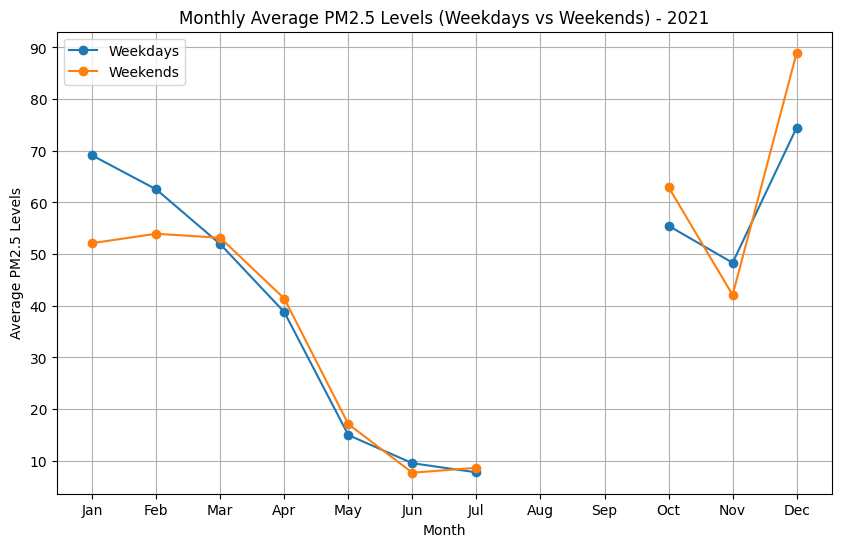

In [39]:
# 2.3
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the station and year 2021
station_data = data[(data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & 
                    (data['Timestamp'].dt.year == 2021)].copy()

# Add a column to classify days as 'Weekday' or 'Weekend'
station_data['Day_Type'] = station_data['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Add a column for the month
station_data['Month'] = station_data['Timestamp'].dt.month

# Calculate monthly average PM2.5 levels for weekdays and weekends
monthly_avg_pm25 = station_data.groupby(['Month', 'Day_Type'])['PM2.5'].mean().unstack()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekday'], label='Weekdays', marker='o')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekend'], label='Weekends', marker='o')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) - 2021')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


3. Spatio-temporal aggregation

In [40]:
# 3.1
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the year 2022
data_2022 = data[data['Timestamp'].dt.year == 2022]

# Define summer (March-May) and monsoon (June-September) months
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

# Filter data for summer and monsoon months
summer_data = data_2022[data_2022['Timestamp'].dt.month.isin(summer_months)]
monsoon_data = data_2022[data_2022['Timestamp'].dt.month.isin(monsoon_months)]

# Calculate average PM2.5 levels for each state during summer and monsoon
summer_avg_pm25 = summer_data.groupby('state')['PM2.5'].mean()
monsoon_avg_pm25 = monsoon_data.groupby('state')['PM2.5'].mean()

# Calculate percentage change: ((Monsoon - Summer) / Summer) * 100
percentage_change = ((monsoon_avg_pm25 - summer_avg_pm25) / summer_avg_pm25) * 100

# Find the state with the most difference (increase or decrease)
most_difference_state = percentage_change.abs().idxmax()
most_difference_value = percentage_change[most_difference_state]

print("Percentage Change in PM2.5 Levels (Monsoon vs Summer) for Each State:")
print(percentage_change)

print(f"\nState with the most difference: {most_difference_state}")
print(f"Percentage difference: {most_difference_value:.2f}%")


Percentage Change in PM2.5 Levels (Monsoon vs Summer) for Each State:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.9

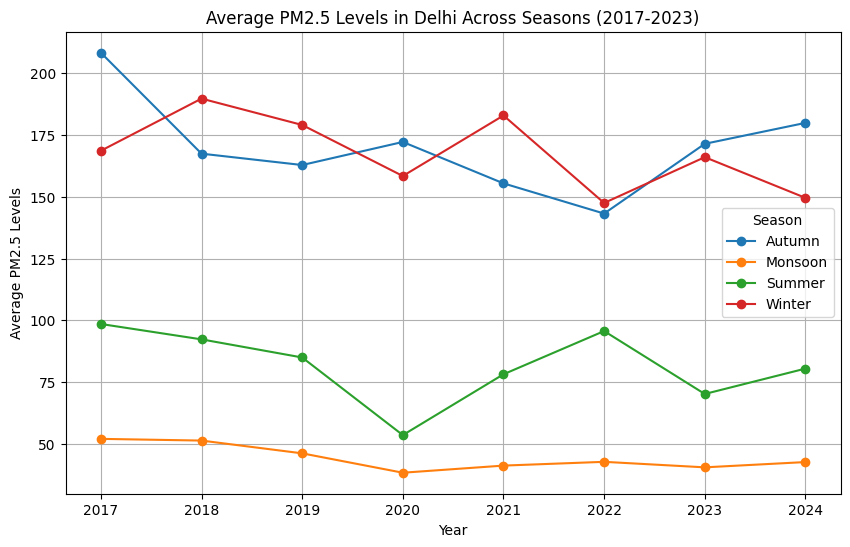

In [41]:
# 3.2
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for Delhi
delhi_data = data[data['state'] == 'Delhi'].copy()

# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

# Add a 'Season' column to the Delhi data
delhi_data['Season'] = delhi_data['Timestamp'].dt.month.apply(get_season)

# Add a 'Year' column to group by year
delhi_data['Year'] = delhi_data['Timestamp'].dt.year

# Calculate the average PM2.5 levels for each season across the years
seasonal_avg_pm25 = delhi_data.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

# Plot the seasonal trends for each year
seasonal_avg_pm25.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average PM2.5 Levels in Delhi Across Seasons (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.legend(title='Season')
plt.grid(True)
plt.show()


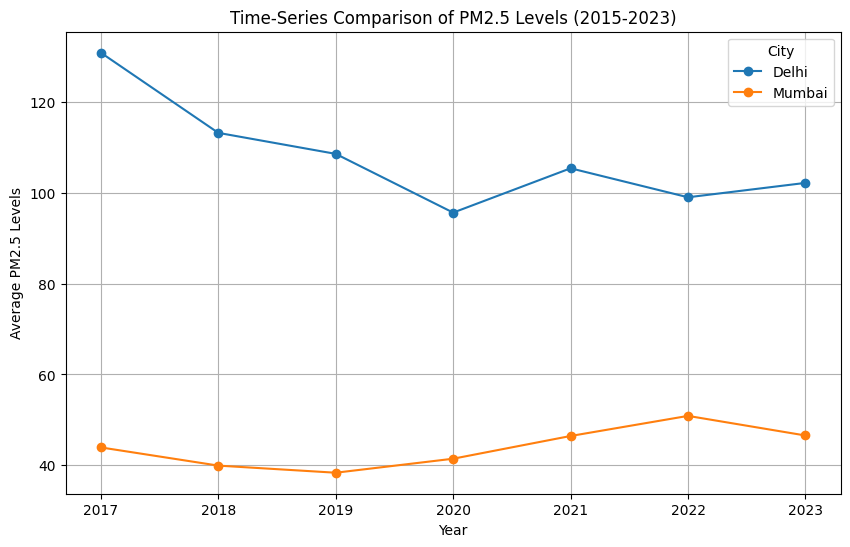

Delhi had more fluctuations in PM2.5 levels with a standard deviation of 11.72.


In [42]:
# 3.3
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for Delhi and Mumbai
delhi_data = data[data['state'] == 'Delhi'].copy()
mumbai_data = data[data['state'] == 'Maharashtra'].copy()

# Add a 'Year' column for grouping
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
mumbai_data['Year'] = mumbai_data['Timestamp'].dt.year

# Calculate yearly average PM2.5 levels for Delhi and Mumbai
delhi_yearly_avg = delhi_data.groupby('Year')['PM2.5'].mean()
mumbai_yearly_avg = mumbai_data.groupby('Year')['PM2.5'].mean()

# Filter data for the years 2015 to 2023
delhi_yearly_avg = delhi_yearly_avg.loc[2015:2023]
mumbai_yearly_avg = mumbai_yearly_avg.loc[2015:2023]

# Plot the time-series graph
plt.figure(figsize=(10, 6))
plt.plot(delhi_yearly_avg.index, delhi_yearly_avg, label='Delhi', marker='o')
plt.plot(mumbai_yearly_avg.index, mumbai_yearly_avg, label='Mumbai', marker='o')
plt.title('Time-Series Comparison of PM2.5 Levels (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.legend(title='City')
plt.grid(True)
plt.show()

# Determine which city had more fluctuations (using standard deviation)
delhi_fluctuation = delhi_yearly_avg.std()
mumbai_fluctuation = mumbai_yearly_avg.std()

if delhi_fluctuation > mumbai_fluctuation:
    print(f"Delhi had more fluctuations in PM2.5 levels with a standard deviation of {delhi_fluctuation:.2f}.")
else:
    print(f"Mumbai had more fluctuations in PM2.5 levels with a standard deviation of {mumbai_fluctuation:.2f}.")


4. Population-Based

In [43]:
# 4.1
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv('C:/Users/ROHIT/Downloads/State_data.csv')

# Count the number of monitoring stations per state
stations_per_state = data.groupby('state')['station'].nunique()

# Merge the station count with state population data
state_data = state_data.merge(stations_per_state, left_on='State', right_on='state', how='left')

# Calculate stations per capita (stations per million people)
state_data['Stations_Per_Capita'] = (state_data['station'] / state_data['Population']) * 1_000_000

# Find the state with the highest stations per capita
highest_stations_state = state_data.loc[state_data['Stations_Per_Capita'].idxmax()]

print(f"State with the highest number of monitoring stations relative to its population: {highest_stations_state['State']}")
print(f"Stations per million people: {highest_stations_state['Stations_Per_Capita']:.2f}")


State with the highest number of monitoring stations relative to its population: Chandigarh
Stations per million people: 2.84


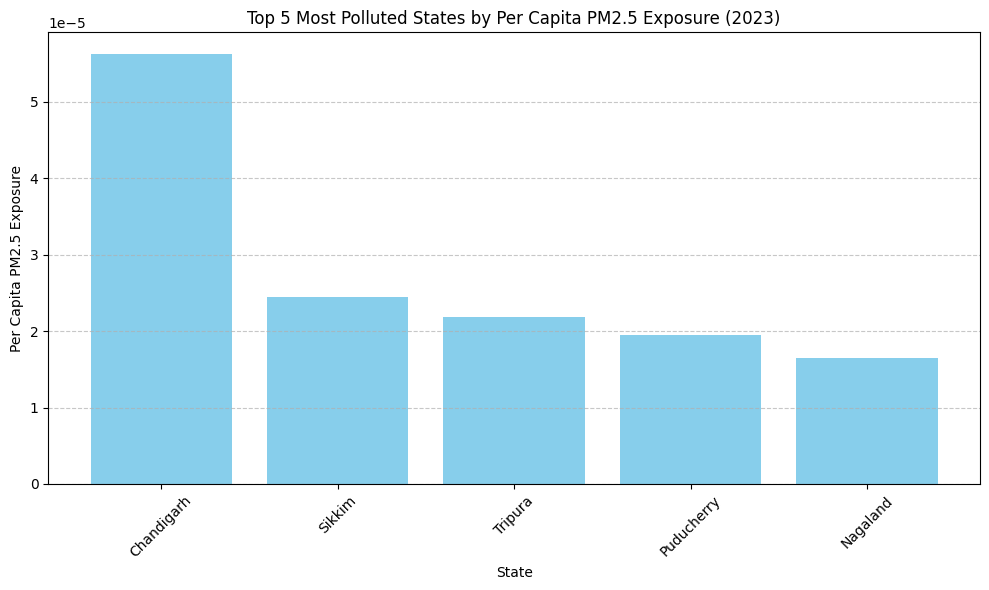

In [44]:
# 4.2
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv('C:/Users/ROHIT/Downloads/State_data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the year 2023
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Calculate average PM2.5 concentration for each state in 2023
state_avg_pm25 = data_2023.groupby('state')['PM2.5'].mean()

# Merge with state population data
state_data = state_data.rename(columns={'State': 'state'})
merged_data = state_data.merge(state_avg_pm25, on='state', how='left')

# Calculate per capita PM2.5 exposure (average PM2.5 per person)
merged_data['Per_Capita_PM2.5'] = merged_data['PM2.5'] / merged_data['Population']

# Select the top 5 most polluted states by per capita PM2.5 exposure
top_5_states = merged_data.nlargest(5, 'Per_Capita_PM2.5')

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['Per_Capita_PM2.5'], color='skyblue')
plt.title('Top 5 Most Polluted States by Per Capita PM2.5 Exposure (2023)')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


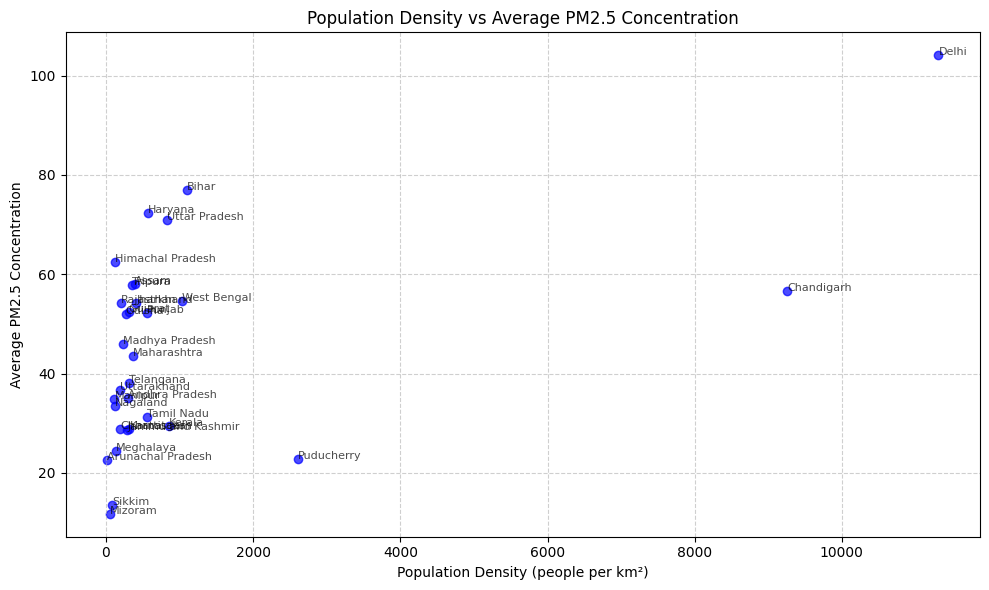

In [45]:
# 4.3
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv('C:/Users/ROHIT/Downloads/State_data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Calculate average PM2.5 concentration for each state across all years
state_avg_pm25 = data.groupby('state')['PM2.5'].mean()

# Merge average PM2.5 data with state population and area data
state_data = state_data.rename(columns={'State': 'state'})
merged_data = state_data.merge(state_avg_pm25, on='state', how='left')

# Calculate population density (people per square kilometer)
merged_data['Population_Density'] = merged_data['Population'] / merged_data['Area (km2)']

# Plot a scatter plot of population density vs average PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Population_Density'], merged_data['PM2.5'], color='blue', alpha=0.7)
plt.title('Population Density vs Average PM2.5 Concentration')
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate points with state names for clarity
for i, row in merged_data.iterrows():
    plt.annotate(row['state'], (row['Population_Density'], row['PM2.5']), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()


5. Area Based

State with the highest PM2.5 concentration per square kilometer: Chandigarh
PM2.5 concentration per km²: 0.4971


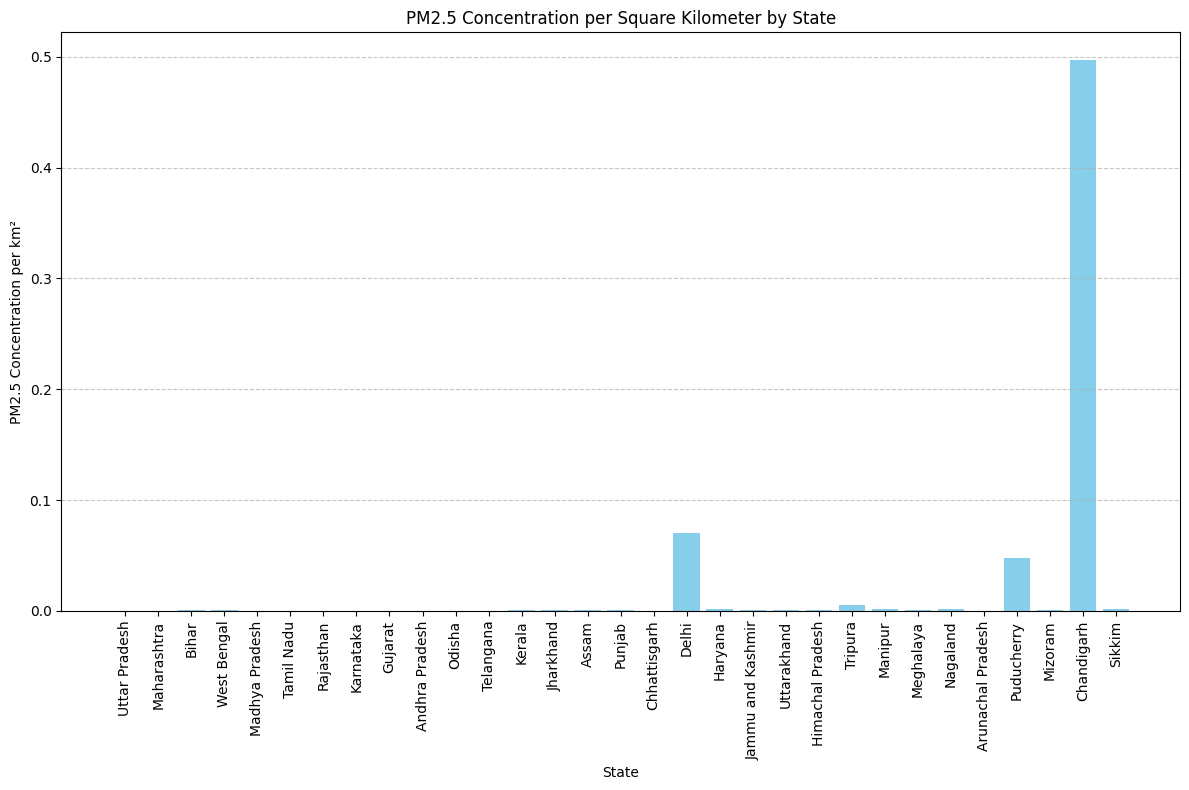

In [48]:
# 5.1
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv('C:/Users/ROHIT/Downloads/State_data.csv')
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Calculate average PM2.5 concentration for each state across all years
state_avg_pm25 = data.groupby('state')['PM2.5'].mean()

# Merge state data (area and population) with average PM2.5 data
state_data = state_data.rename(columns={'State': 'state'})
merged_data = state_data.merge(state_avg_pm25, on='state', how='left')

# Calculate PM2.5 concentration per square kilometer
merged_data['PM2.5_per_km2'] = merged_data['PM2.5'] / merged_data['Area (km2)']

# Find the state with the highest PM2.5 concentration per square kilometer
highest_pm25_state = merged_data.loc[merged_data['PM2.5_per_km2'].idxmax()]
print(f"State with the highest PM2.5 concentration per square kilometer: {highest_pm25_state['state']}")
print(f"PM2.5 concentration per km²: {highest_pm25_state['PM2.5_per_km2']:.4f}")

# Plot pollution levels relative to area for all states
plt.figure(figsize=(12, 8))
plt.bar(merged_data['state'], merged_data['PM2.5_per_km2'], color='skyblue')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per km²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

State with the highest density of monitoring stations: Delhi
Monitoring stations per km²: 0.0270


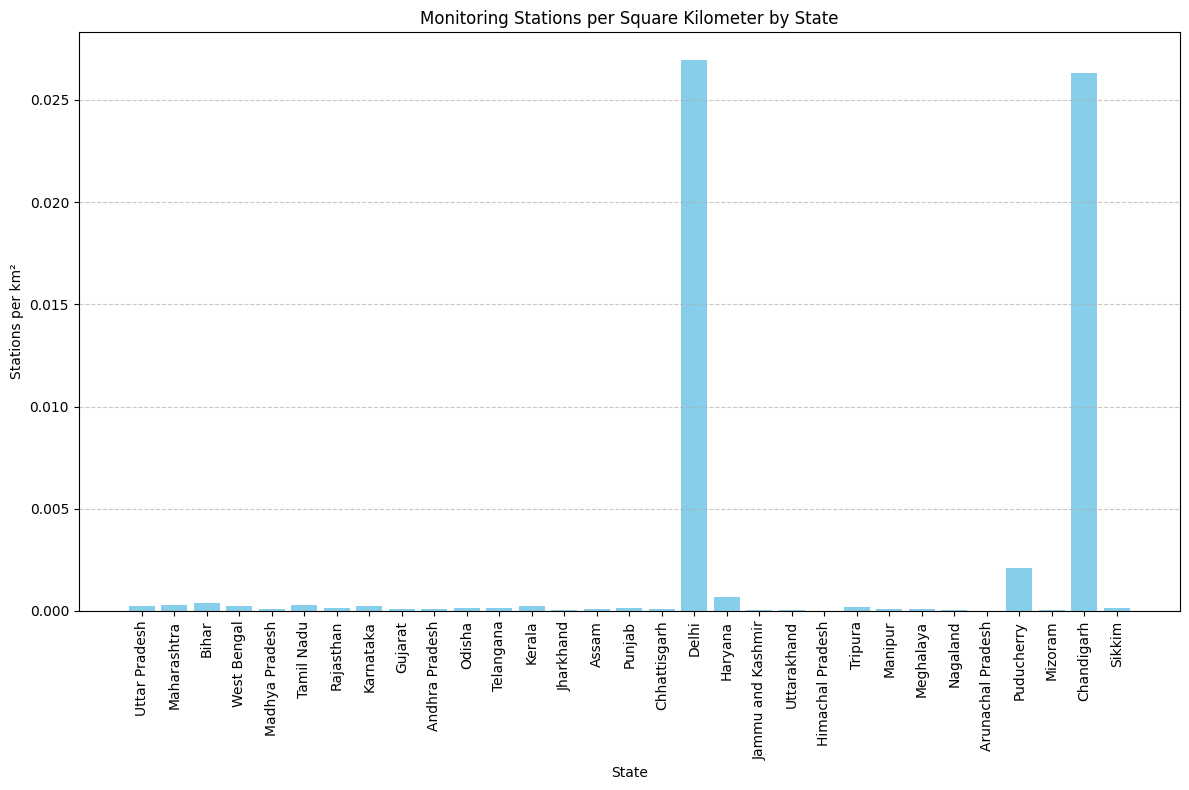

In [49]:
# 5.2
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv('C:/Users/ROHIT/Downloads/State_data.csv')

# Count the number of unique monitoring stations per state
stations_per_state = data.groupby('state')['station'].nunique()

# Merge station count with state area data
state_data = state_data.rename(columns={'State': 'state'})
merged_data = state_data.merge(stations_per_state, on='state', how='left')

# Calculate the number of monitoring stations per square kilometer
merged_data['Stations_per_km2'] = merged_data['station'] / merged_data['Area (km2)']

# Find the state with the highest density of monitoring stations
highest_density_state = merged_data.loc[merged_data['Stations_per_km2'].idxmax()]
print(f"State with the highest density of monitoring stations: {highest_density_state['state']}")
print(f"Monitoring stations per km²: {highest_density_state['Stations_per_km2']:.4f}")

# Plot the number of monitoring stations per square kilometer for all states
plt.figure(figsize=(12, 8))
plt.bar(merged_data['state'], merged_data['Stations_per_km2'], color='skyblue')
plt.title('Monitoring Stations per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('Stations per km²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


State with the highest density of monitoring stations: Delhi
Monitoring stations per km²: 0.0270


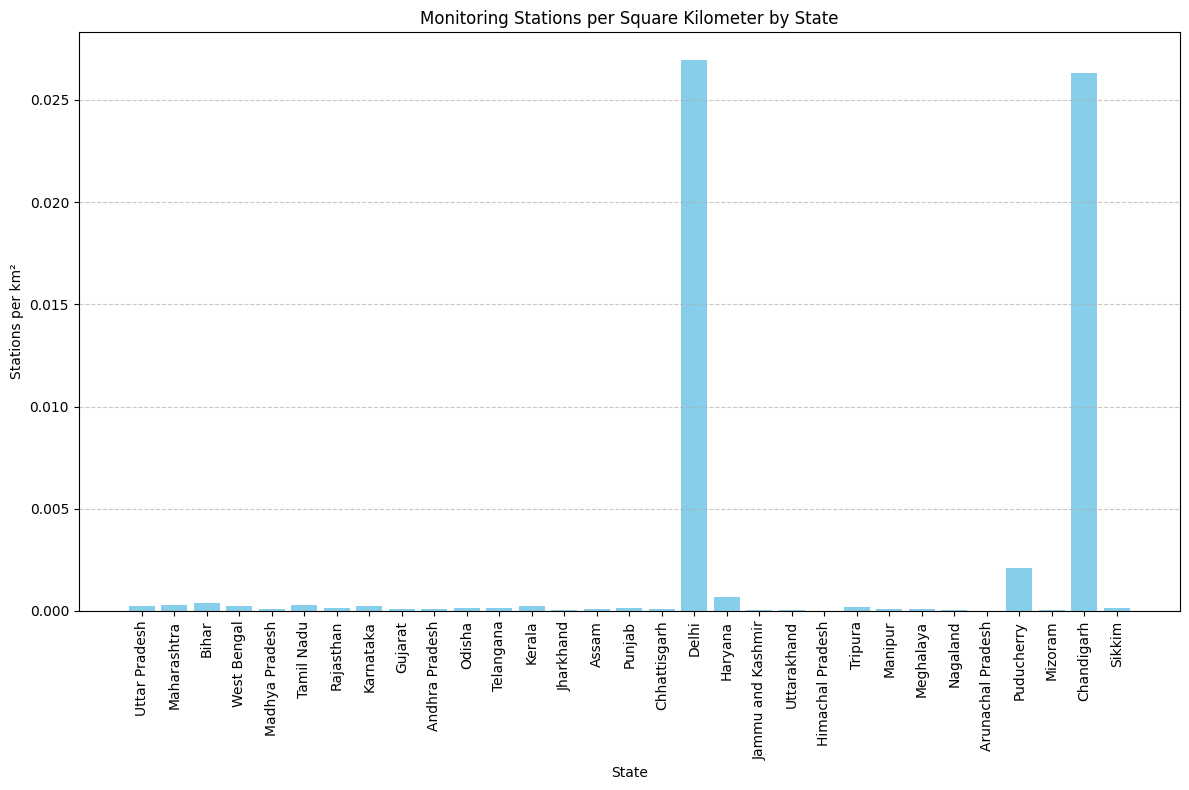

In [51]:
# 5.3
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv('C:/Users/ROHIT/Downloads/State_data.csv')

# Count the number of unique monitoring stations per state
stations_per_state = data.groupby('state')['station'].nunique()

# Merge station count with state area data
state_data = state_data.rename(columns={'State': 'state'})
merged_data = state_data.merge(stations_per_state, on='state', how='left')

# Calculate the number of monitoring stations per square kilometer
merged_data['Stations_per_km2'] = merged_data['station'] / merged_data['Area (km2)']

# Find the state with the highest density of monitoring stations
highest_density_state = merged_data.loc[merged_data['Stations_per_km2'].idxmax()]
print(f"State with the highest density of monitoring stations: {highest_density_state['state']}")
print(f"Monitoring stations per km²: {highest_density_state['Stations_per_km2']:.4f}")

# Plot the number of monitoring stations per square kilometer for all states
plt.figure(figsize=(12, 8))
plt.bar(merged_data['state'], merged_data['Stations_per_km2'], color='skyblue')
plt.title('Monitoring Stations per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('Stations per km²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

6. Funding Based

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_14956\2169705226.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['NCAP_Funded'] = data_2021['state'].apply(lambda x: 'Yes' if x in ncap_states else 'No')


Average PM2.5 levels in NCAP-funded states (2021): 62.06
Average PM2.5 levels in non-NCAP-funded states (2021): 60.33


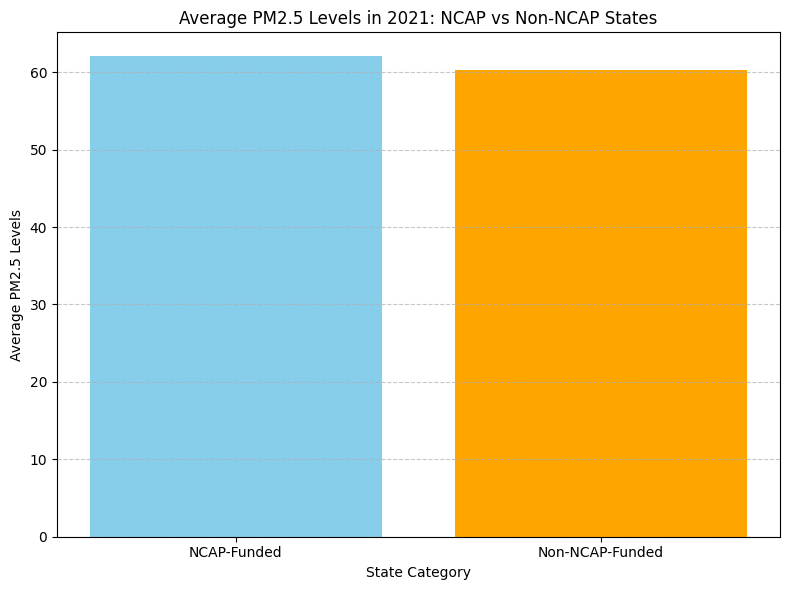

In [52]:
import pandas as pd

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
ncap_funding = pd.read_csv(r"C:\Users\ROHIT\Downloads\NCAP_Funding.csv")

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the year 2021
data_2021 = data[data['Timestamp'].dt.year == 2021]

# Identify states that received NCAP funding
ncap_states = ncap_funding['State'].unique()

# Add a column to indicate whether a state received NCAP funding
data_2021['NCAP_Funded'] = data_2021['state'].apply(lambda x: 'Yes' if x in ncap_states else 'No')

# Calculate average PM2.5 levels for NCAP-funded and non-NCAP-funded states
avg_pm25_ncap = data_2021[data_2021['NCAP_Funded'] == 'Yes']['PM2.5'].mean()
avg_pm25_non_ncap = data_2021[data_2021['NCAP_Funded'] == 'No']['PM2.5'].mean()

# Print results
print(f"Average PM2.5 levels in NCAP-funded states (2021): {avg_pm25_ncap:.2f}")
print(f"Average PM2.5 levels in non-NCAP-funded states (2021): {avg_pm25_non_ncap:.2f}")

# Plot comparison
import matplotlib.pyplot as plt

categories = ['NCAP-Funded', 'Non-NCAP-Funded']
values = [avg_pm25_ncap, avg_pm25_non_ncap]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'orange'])
plt.title('Average PM2.5 Levels in 2021: NCAP vs Non-NCAP States')
plt.ylabel('Average PM2.5 Levels')
plt.xlabel('State Category')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_14956\4016163807.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Year'] = assam_data['Timestamp'].dt.year


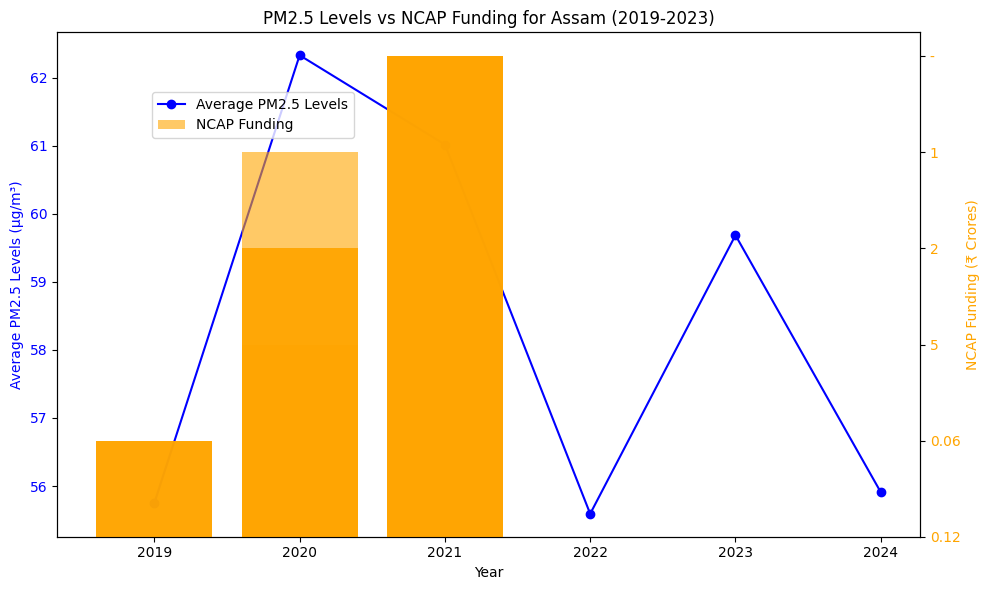

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
ncap_funding = pd.read_csv(r"C:\Users\ROHIT\Downloads\NCAP_Funding.csv")

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for Assam
assam_data = data[data['state'] == 'Assam']

# Add a 'Year' column for grouping
assam_data['Year'] = assam_data['Timestamp'].dt.year

# Calculate yearly average PM2.5 levels for Assam
yearly_avg_pm25 = assam_data.groupby('Year')['PM2.5'].mean()

# Extract NCAP funding for Assam
assam_funding = ncap_funding[ncap_funding['State'] == 'Assam']
assam_funding = assam_funding[['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']]
assam_funding.columns = ['2019', '2020', '2021']
assam_funding = assam_funding.melt(var_name='Year', value_name='Funding')
assam_funding['Year'] = pd.to_numeric(assam_funding['Year'])
assam_funding.set_index('Year', inplace=True)

# Plot PM2.5 levels and NCAP funding
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels
ax1.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, color='blue', marker='o', label='Average PM2.5 Levels')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('PM2.5 Levels vs NCAP Funding for Assam (2019-2023)')

# Plot NCAP funding on a secondary axis
ax2 = ax1.twinx()
ax2.bar(assam_funding.index, assam_funding['Funding'], color='orange', alpha=0.6, label='NCAP Funding')
ax2.set_ylabel('NCAP Funding (₹ Crores)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
plt.tight_layout()
plt.show()


In [59]:
# 6.3

# Replace '-' with 0 and convert relevant columns to numeric
cols_to_convert = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']
ncap_funding_df[cols_to_convert] = ncap_funding_df[cols_to_convert].replace('-', 0).apply(pd.to_numeric)

# Calculate the total fund released by summing the funds from each FY
ncap_funding_df['Total Fund Released Calc'] = (
    ncap_funding_df['Amount released during FY 2019-20'] +
    ncap_funding_df['Amount released during FY 2020-21'] +
    ncap_funding_df['Amount released during FY 2021-22']
)

# Group NCAP funding by state and sum the total fund released
state_funding = ncap_funding_df.groupby('State')['Total Fund Released Calc'].sum().reset_index()

# Merge the two dataframes
merged_data = pd.merge(state_df, state_funding, on='State', how='inner')

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Use a colormap to assign a different color to each state
num_states = len(merged_data['State'].unique())
colors = plt.cm.get_cmap('viridis', num_states)

for i, state in enumerate(merged_data['State'].unique()):
    state_data = merged_data[merged_data['State'] == state]
    plt.scatter(state_data['Area (km2)'], state_data['Total Fund Released Calc'],
                color=colors(i), label=state, s=100)

# Set the plot title and labels
plt.title('Area vs. Total NCAP Funding by State', fontsize=16)
plt.xlabel('Area (km²)', fontsize=12)
plt.ylabel('Total Fund Released (crores)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Place the legend outside the plot area
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

NameError: name 'state_df' is not defined

7. Miscellaneous Questions

In [46]:
# 5.1
import pandas as pd
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for the year 2023
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Calculate average PM2.5 concentration for each city in 2023
city_avg_pm25 = data_2023.groupby('city')['PM2.5'].mean()

# Identify the most polluted city in 2023
most_polluted_city = city_avg_pm25.idxmax()
most_polluted_city_avg = city_avg_pm25.max()

# Filter data for the most polluted city
most_polluted_city_data = data_2023[data_2023['city'] == most_polluted_city]

# Calculate the total number of days and days with hazardous PM2.5 levels (>300 µg/m³)
total_days = most_polluted_city_data['Timestamp'].dt.date.nunique()
hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5'] > 300]['Timestamp'].dt.date.nunique()

# Calculate the percentage of hazardous days
percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Average PM2.5 concentration: {most_polluted_city_avg:.2f} µg/m³")
print(f"Total days recorded: {total_days}")
print(f"Hazardous days (>300 µg/m³): {hazardous_days}")
print(f"Percentage of hazardous days: {percentage_hazardous_days:.2f}%")


Most polluted city in 2023: Darbhanga
Average PM2.5 concentration: 242.92 µg/m³
Total days recorded: 365
Hazardous days (>300 µg/m³): 3
Percentage of hazardous days: 0.82%


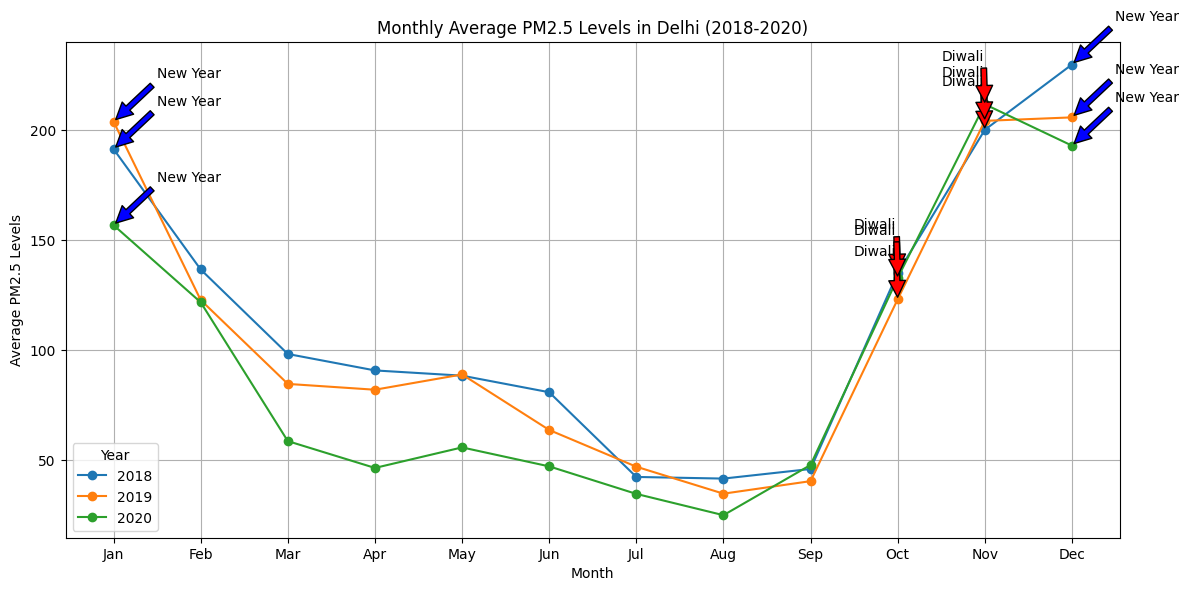

In [47]:

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter data for Delhi and the years 2018-2020
delhi_data = data[(data['state'] == 'Delhi') & (data['Timestamp'].dt.year.isin([2018, 2019, 2020]))].copy()

# Add columns for year and month
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month

# Calculate monthly average PM2.5 levels
monthly_avg_pm25 = delhi_data.groupby(['Year', 'Month'])['PM2.5'].mean().unstack()

# Plot the monthly average PM2.5 levels for each year
plt.figure(figsize=(12, 6))
for year in [2018, 2019, 2020]:
    plt.plot(monthly_avg_pm25.columns, monthly_avg_pm25.loc[year], label=f'{year}', marker='o')

# Highlight Diwali (October-November) and New Year (December-January) months with arrows
diwali_months = [10, 11]  # October and November
new_year_months = [12, 1]  # December and January

for year in [2018, 2019, 2020]:
    for month in diwali_months:
        if month in monthly_avg_pm25.columns:
            plt.annotate('Diwali', 
                         xy=(month, monthly_avg_pm25.loc[year, month]), 
                         xytext=(month - 0.5, monthly_avg_pm25.loc[year, month] + 20),
                         arrowprops=dict(facecolor='red', shrink=0.05),
                         fontsize=10)
    for month in new_year_months:
        if month in monthly_avg_pm25.columns:
            plt.annotate('New Year', 
                         xy=(month, monthly_avg_pm25.loc[year, month]), 
                         xytext=(month + 0.5, monthly_avg_pm25.loc[year, month] + 20),
                         arrowprops=dict(facecolor='blue', shrink=0.05),
                         fontsize=10)

# Add labels and legend
plt.title('Monthly Average PM2.5 Levels in Delhi (2018-2020)')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


State with the highest NCAP funding in 2020: Assam


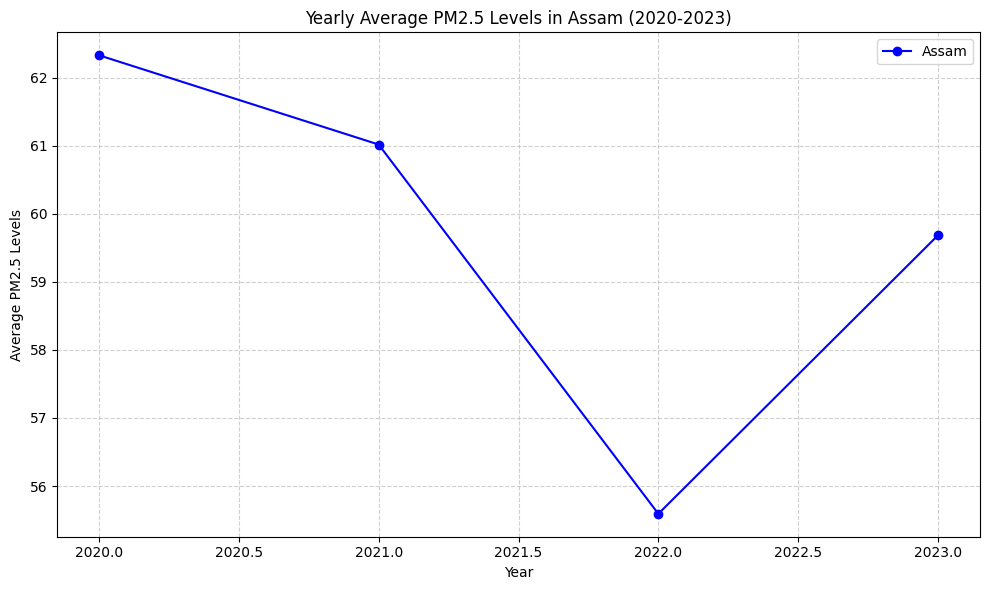

Yearly average PM2.5 in Assam in 2020: 62.33
Yearly average PM2.5 in Assam in 2023: 59.69
Percentage change in air quality from 2020 to 2023: -4.24%


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
ncap_funding = pd.read_csv(r"C:\Users\ROHIT\Downloads\NCAP_Funding.csv")

# Ensure 'Timestamp' is in datetime format and 'PM2.5' is numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Identify the state that received the highest NCAP funding in 2020
ncap_funding['Amount released during FY 2020-21'] = pd.to_numeric(ncap_funding['Amount released during FY 2020-21'], errors='coerce')
highest_funded_state = ncap_funding.loc[ncap_funding['Amount released during FY 2020-21'].idxmax(), 'State']

print(f"State with the highest NCAP funding in 2020: {highest_funded_state}")

# Filter data for the highest funded state and explicitly create a copy to avoid SettingWithCopyWarning
state_data = data[data['state'] == highest_funded_state].copy()

# Add a 'Year' column for grouping
state_data['Year'] = state_data['Timestamp'].dt.year

# Calculate yearly average PM2.5 levels for the state
yearly_avg_pm25 = state_data.groupby('Year')['PM2.5'].mean()

# Filter data for years from 2020 to 2023 to observe trends
yearly_avg_pm25_filtered = yearly_avg_pm25.loc[2020:2023]

# Plot the yearly average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25_filtered.index, yearly_avg_pm25_filtered.values, marker='o', color='blue', label=f'{highest_funded_state}')
plt.title(f'Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Analyze improvement in air quality (percentage change from 2020 to 2023)
if len(yearly_avg_pm25_filtered) >= 2:
    pm25_2020 = yearly_avg_pm25_filtered.loc[2020]
    pm25_2023 = yearly_avg_pm25_filtered.loc[2023]
    percentage_change = ((pm25_2023 - pm25_2020) / pm25_2020) * 100

    print(f"Yearly average PM2.5 in {highest_funded_state} in 2020: {pm25_2020:.2f}")
    print(f"Yearly average PM2.5 in {highest_funded_state} in 2023: {pm25_2023:.2f}")
    print(f"Percentage change in air quality from 2020 to 2023: {percentage_change:.2f}%")
else:
    print("Not enough data available to analyze trends from 2020 to 2023.")


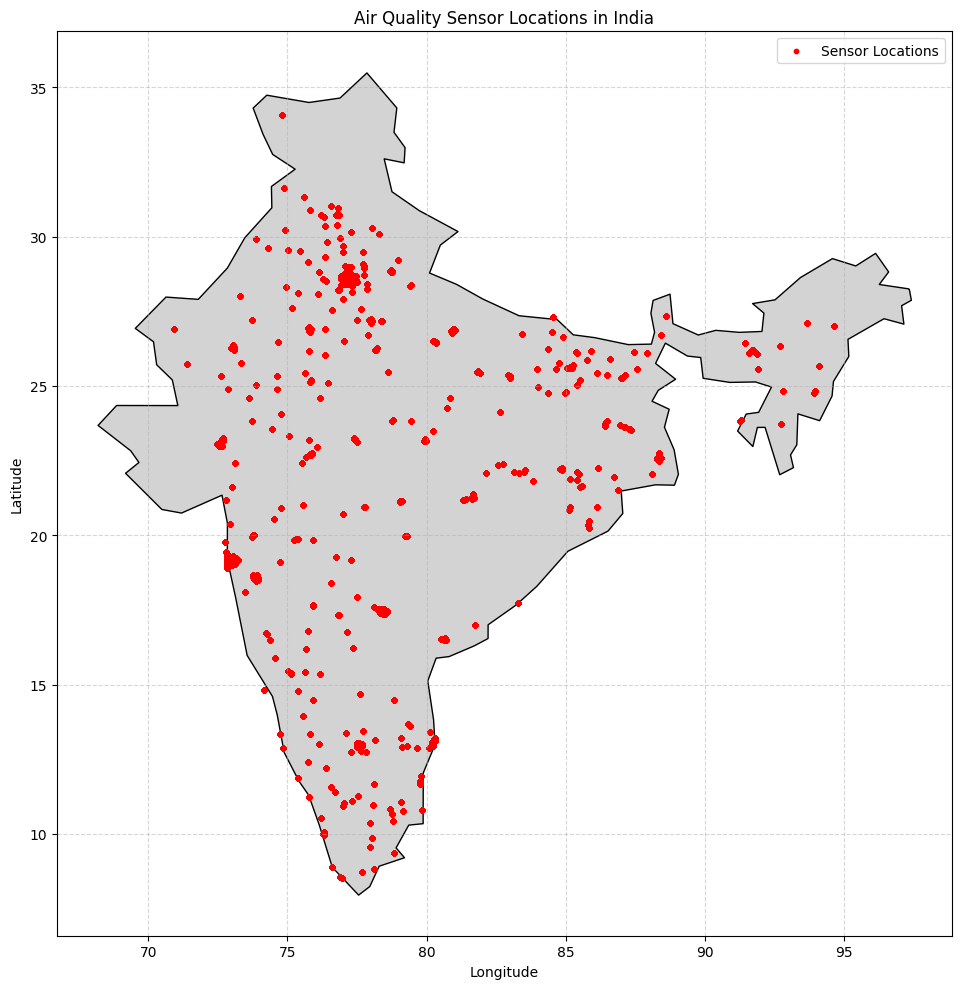

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')

# Ensure latitude and longitude columns are numeric
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

# Drop rows with missing latitude or longitude
data = data.dropna(subset=['latitude', 'longitude'])

# Load India's shapefile (downloaded from Natural Earth or similar source)
# Replace the path below with the actual path to your shapefile
india_shapefile_path = r"C:\Users\ROHIT\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp"
india_map = gpd.read_file(india_shapefile_path)

# Filter for India only
india_map = india_map[india_map['ADMIN'] == 'India']

# Create a GeoDataFrame for sensor locations
sensor_locations = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['longitude'], data['latitude']),
    crs="EPSG:4326"
)

# Plot the map of India
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
india_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot sensor locations on the map
sensor_locations.plot(ax=ax, color='red', markersize=10, label='Sensor Locations')

# Add labels and legend
plt.title('Air Quality Sensor Locations in India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="upper right")  # Specify a fixed legend location to avoid the warning
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

State with the highest PM2.5 concentration per square kilometer: Chandigarh
PM2.5 concentration per km²: 0.4971


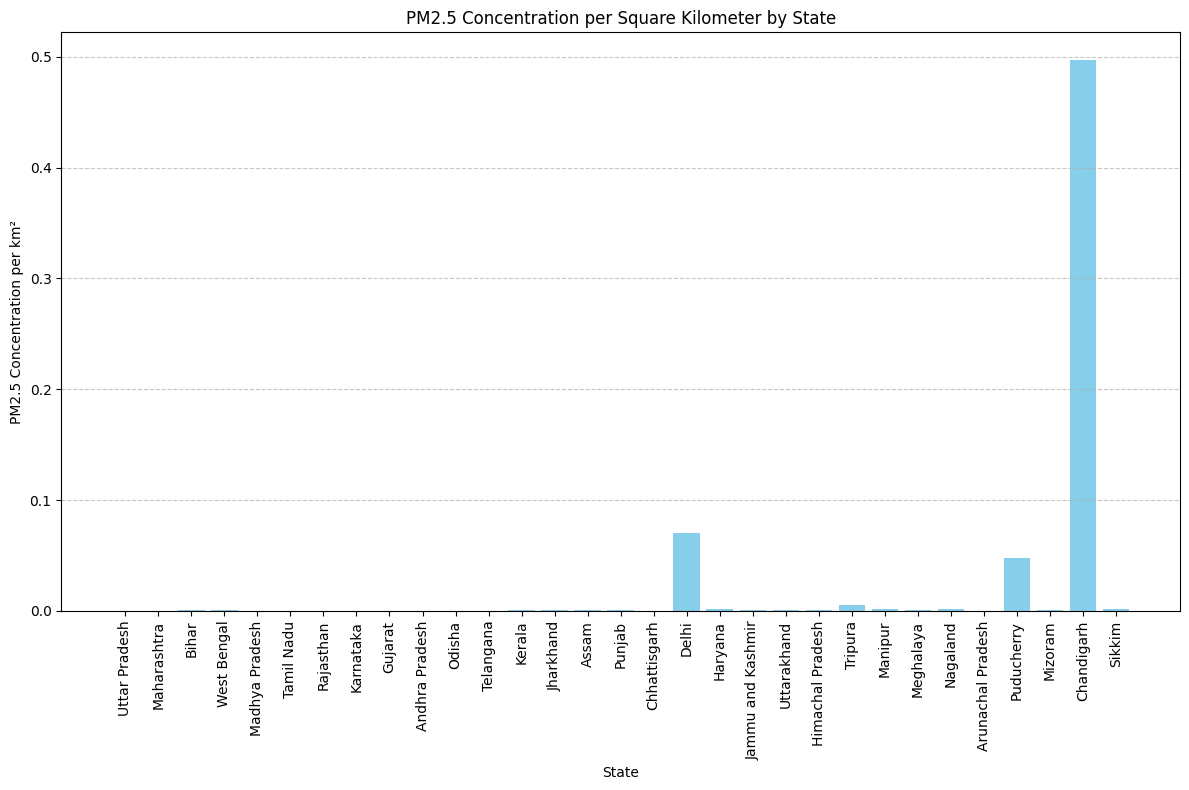

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('C:/Users/ROHIT/Downloads/Data.csv')
state_data = pd.read_csv(r"C:\Users\ROHIT\Downloads\State_data.csv")

# Ensure PM2.5 is numeric
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Calculate average PM2.5 concentration for each state across all years
state_avg_pm25 = data.groupby('state')['PM2.5'].mean()

# Merge state population and area data with average PM2.5 data
state_data = state_data.rename(columns={'State': 'state'})
merged_data = state_data.merge(state_avg_pm25, on='state', how='left')

# Calculate PM2.5 concentration per square kilometer
merged_data['PM2.5_per_km2'] = merged_data['PM2.5'] / merged_data['Area (km2)']

# Find the state with the highest PM2.5 concentration per square kilometer
highest_pm25_state = merged_data.loc[merged_data['PM2.5_per_km2'].idxmax()]
print(f"State with the highest PM2.5 concentration per square kilometer: {highest_pm25_state['state']}")
print(f"PM2.5 concentration per km²: {highest_pm25_state['PM2.5_per_km2']:.4f}")

# Plot pollution levels relative to area for all states
plt.figure(figsize=(12, 8))
plt.bar(merged_data['state'], merged_data['PM2.5_per_km2'], color='skyblue')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per km²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

